In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [104]:
warnings.filterwarnings(action='ignore')

In [2]:
currency=pd.read_csv('/Users/liyuefan/Documents/gtja/CADUSD.csv')
currency['update_date']=pd.to_datetime(currency['update_date'])
currency=currency[currency['USDCAD.FX']!=0]

In [3]:
wti=pd.read_csv('/Users/liyuefan/Documents/gtja/WTI.csv')
wti['update_date']=pd.to_datetime(wti['update_date'])
wti=wti[wti['close']!=0]

In [4]:
tsi=pd.read_csv('/Users/liyuefan/Documents/gtja/ISIXIU.csv')
tsi['Date']=pd.to_datetime(tsi['Date'])
tsi=tsi.rename(columns={'PX_LAST':'close','Date':'update_date'})

In [5]:
from scipy.stats import pearsonr

In [6]:
currency['cad']=1./currency['USDCAD.FX']
currency['aud']=currency['AUDUSD.FX']

In [7]:
wti=pd.merge(wti,currency,on=['update_date'],how='inner')

In [8]:
tsi=pd.merge(tsi,currency,on=['update_date'],how='inner')

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
tsi['close_diff']=np.log(tsi['close'])
tsi['close_diff']=tsi['close_diff'].diff()
tsi=tsi.dropna(axis=0)
tsi.index=[tsi['update_date']]

wti['close_diff']=np.log(wti['close'])
wti['close_diff']=wti['close_diff'].diff()
wti=wti.dropna(axis=0)
wti.index=[wti['update_date']]

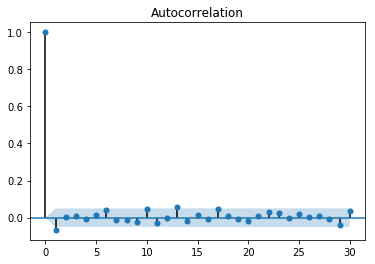

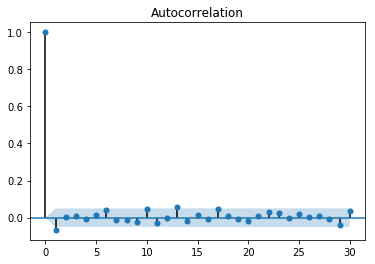

In [11]:
plot_acf(wti['close_diff'],lags=30)

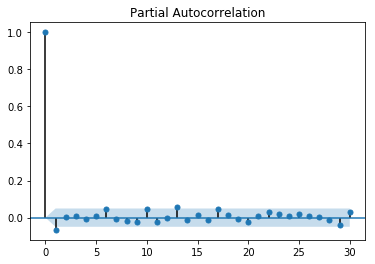

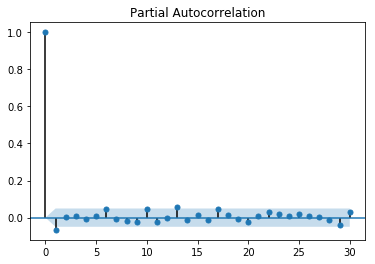

In [12]:
plot_pacf(wti['close_diff'],lags=30)

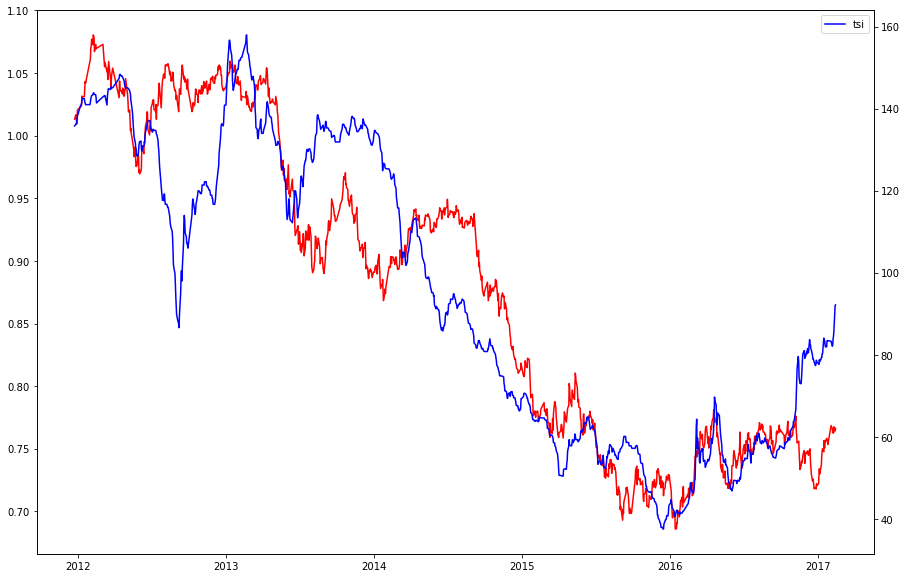

In [13]:
plt.figure(figsize=(15,10))
plt.plot(tsi['aud'],'red',label='AUD')
ax2=plt.twinx()
ax2.plot(tsi['close'],'blue',label='tsi')
plt.legend()

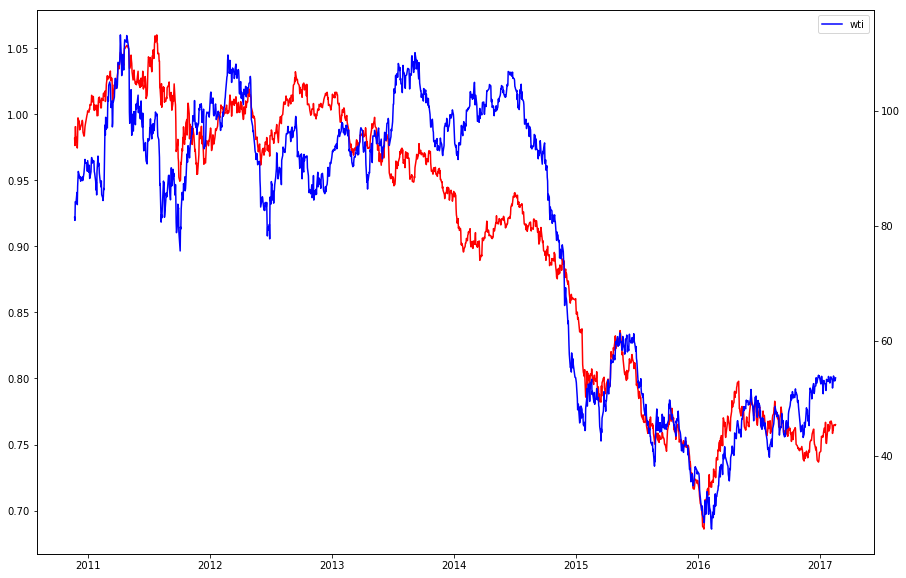

In [14]:
plt.figure(figsize=(15,10))
plt.plot(wti['cad'],'red',label='AUD')
ax2=plt.twinx()
ax2.plot(wti['close'],'blue',label='wti')
plt.legend()

In [15]:
tsi['ratio']=tsi['close']/tsi['aud']
wti['ratio']=wti['close']/wti['cad']

In [16]:
tsi['ma_ratio']=pd.rolling_mean(tsi['ratio'],60)
wti['ma_ratio']=pd.rolling_mean(wti['ratio'],60)

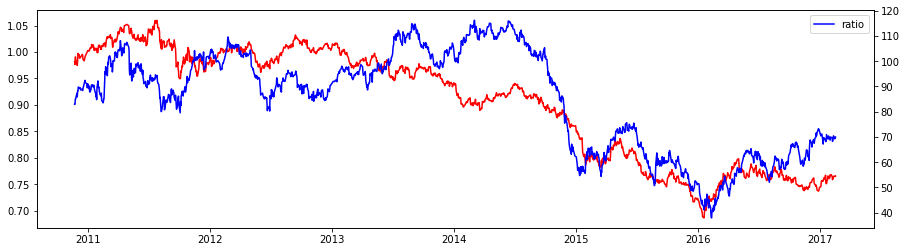

In [17]:
plt.figure(figsize=(15,4))
plt.plot(wti['cad'],'red',label='AUD')
ax2=plt.twinx()
# ax2.plot(wti['close'],'blue',label='wti')
ax2.plot(wti['ratio'],'blue',label='ratio')
plt.legend()

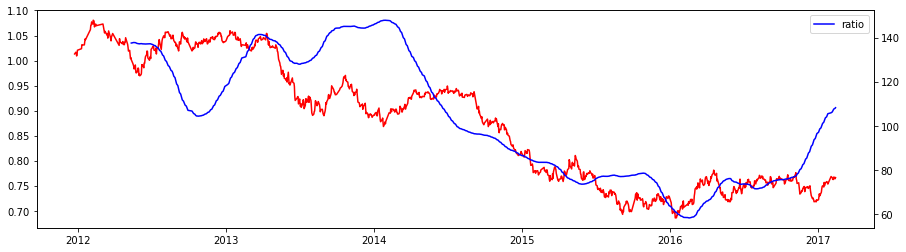

In [18]:
plt.figure(figsize=(15,4))
plt.plot(tsi['aud'],'red',label='AUD')
ax2=plt.twinx()
# ax2.plot(tsi['close'],'blue',label='wti')
ax2.plot(tsi['ma_ratio'],'blue',label='ratio')
plt.legend()

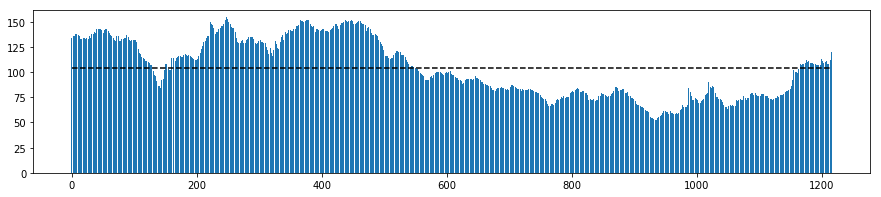

In [19]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(len(tsi)),tsi['ratio'])
plt.hlines(np.mean(tsi['ratio']),0,len(tsi),linestyles='dashed')

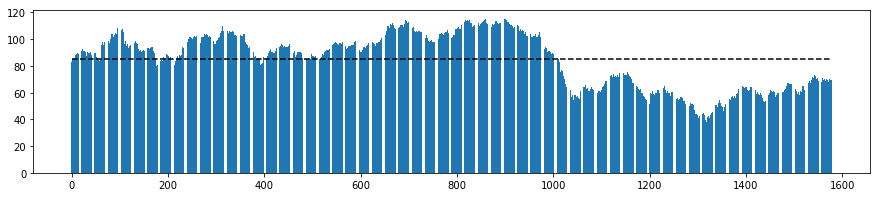

In [20]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(len(wti)),wti['ratio'])
plt.hlines(np.mean(wti['ratio']),0,len(wti),linestyles='dashed')

In [21]:
corr_tsi,p_tsi=pearsonr(tsi['aud'],tsi['close'])

In [22]:
corr_wti,p_wti=pearsonr(wti['cad'],wti['close'])

In [23]:
print '#'*10,'wti','#'*10
print corr_wti,'\t',p_wti
print '#'*10,'tsi','#'*10
print corr_tsi,'\t',p_tsi

########## wti ##########
0.909897566842 	0.0
########## tsi ##########
0.888351200187 	0.0


In [25]:
wd=500
for i in range(wd,len(tsi)):
    X=tsi.iloc[i-wd:i,:][['update_date','aud','close']]
    corr_tsi_,p_tsi_=pearsonr(X['aud'],X['close'])
    print X.iloc[0,:]['update_date'],'\t',corr_tsi_,'\t',p_tsi_
    

2011-12-23 00:00:00 	0.0793725665751 	0.0761987609812
2011-12-26 00:00:00 	0.084242059996 	0.0597895762197
2011-12-27 00:00:00 	0.0896356256001 	0.0451417644877
2011-12-28 00:00:00 	0.0947240543211 	0.0342126694826
2011-12-29 00:00:00 	0.0993175162348 	0.0263684510488
2011-12-30 00:00:00 	0.103789292618 	0.020272678483
2012-01-06 00:00:00 	0.107660691356 	0.0160250522714
2012-01-09 00:00:00 	0.111091779111 	0.0129344787178
2012-01-10 00:00:00 	0.115166079619 	0.00995676856367
2012-01-11 00:00:00 	0.11908065566 	0.00768624077204
2012-01-16 00:00:00 	0.122628426266 	0.00604075249879
2012-01-17 00:00:00 	0.125645441134 	0.00489835007191
2012-01-18 00:00:00 	0.128162971788 	0.00409842889798
2012-01-19 00:00:00 	0.1299843881 	0.00359552336555
2012-01-30 00:00:00 	0.131651124592 	0.00318507763488
2012-01-31 00:00:00 	0.132814883244 	0.00292425047151
2012-02-01 00:00:00 	0.133426383539 	0.00279513025122
2012-02-02 00:00:00 	0.133569935981 	0.00276558107522
2012-02-03 00:00:00 	0.133555897708 

/Users/liyuefan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liyuefan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liyuefan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

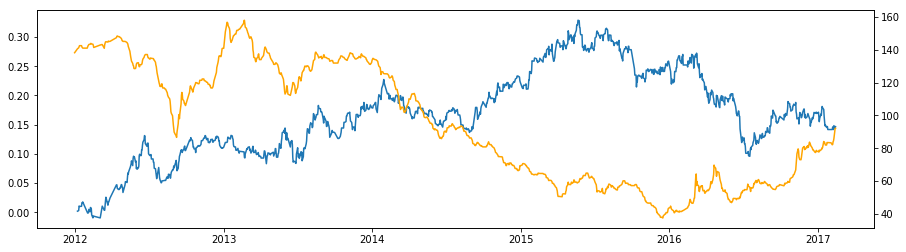

In [101]:
tsi['close_lag']=tsi['close'].shift(2)

tsi=tsi.dropna(subset=['close_lag'],axis=0)

pearsonr(tsi['aud'],tsi['close_lag'])

tsi['rr_lag']=np.log(tsi['close_lag'])
tsi['rr_lag']=tsi['rr_lag'].diff()
tsi['rr_aud']=np.log(tsi['aud'])
tsi['rr_aud']=tsi['rr_aud'].diff()

tsi['sign_lag']=tsi['rr_lag'].apply(lambda x:np.sign(x) if np.abs(x)>0.00 else 0)
tsi['sign_aud']=tsi['rr_aud'].apply(lambda x:np.sign(x) if np.abs(x)>0.00 else 0)

tsi=tsi.dropna(subset=['sign_aud','sign_lag'],axis=0)

tsi['d_r']=tsi['sign_lag']*tsi['rr_aud']

tsi['cum_dr']=tsi['d_r'].cumsum()

plt.figure(figsize=(15,4))
plt.plot(tsi['cum_dr'])
ax2=plt.twinx()
ax2.plot(tsi['close'],color='orange')

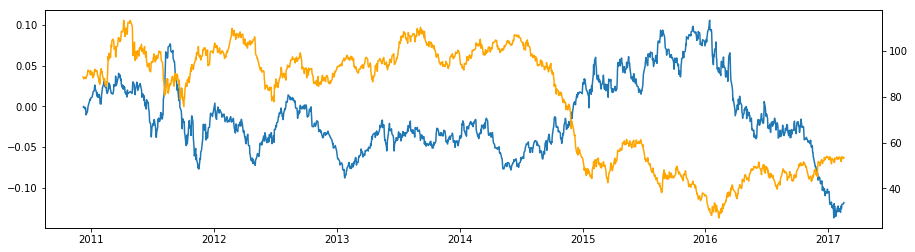

In [106]:
wti['close_lag']=wti['close'].shift(2)

wti=wti.dropna(subset=['close_lag'],axis=0)

pearsonr(wti['cad'],wti['close_lag'])

wti['rr_lag']=np.log(wti['close_lag'])
wti['rr_lag']=wti['rr_lag'].diff()
wti['rr_cad']=np.log(wti['cad'])
wti['rr_cad']=wti['rr_cad'].diff()

wti['sign_lag']=wti['rr_lag'].apply(lambda x:np.sign(x) if np.abs(x)>0.0 else 0)
wti['sign_cad']=wti['rr_cad'].apply(lambda x:np.sign(x) if np.abs(x)>0.0 else 0)

wti=wti.dropna(subset=['sign_cad','sign_lag'],axis=0)

wti['d_r']=wti['sign_lag']*wti['rr_cad']

wti['cum_dr']=wti['d_r'].cumsum()

plt.figure(figsize=(15,4))
plt.plot(wti['cum_dr'])
ax2=plt.twinx()
ax2.plot(wti['close'],color='orange')

In [109]:
tsi=tsi.dropna(subset=['rr_lag','rr_aud'],axis=0)

In [110]:
pearsonr(tsi['rr_lag'],tsi['rr_aud'])

(0.01184747897511533, 0.68043166969531876)